# Imports

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties

In [5]:
shhs1 = pd.read_csv('../data/raw/shhs1-dataset-0.20.0.csv')
shhs2 = pd.read_csv('../data/raw/shhs2-dataset-0.20.0.csv', sep=',', encoding='latin-1')

C:\Users\Risto Trajanov\AppData\Local\Temp\ipykernel_21568\3223228035.py:1: DtypeWarning: Columns (1214) have mixed types. Specify dtype option on import or set low_memory=False.
  shhs1 = pd.read_csv('../data/raw/shhs1-dataset-0.20.0.csv')
C:\Users\Risto Trajanov\AppData\Local\Temp\ipykernel_21568\3223228035.py:2: DtypeWarning: Columns (1216) have mixed types. Specify dtype option on import or set low_memory=False.
  shhs2 = pd.read_csv('../data/raw/shhs2-dataset-0.20.0.csv', sep=',', encoding='latin-1')


# EDA

In [6]:
# Function to add data labels
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., 1*height, '%d' % int(height), ha='center', va='bottom', fontsize=9)

In [7]:
# Function to add median labels
def add_median_labels(median, ax, dataset, right_amt=1.1):
    if dataset == 'shhs1':
      ax.text(median * right_amt, ax.get_ylim()[1] * 0.95, f'Median ({dataset}): {median:.2f}', color='red', ha='left', fontsize=8)
    else:
      ax.text(median * right_amt, ax.get_ylim()[1] * 0.91, f'Median ({dataset}): {median:.2f}', color='red', ha='left', fontsize=8)

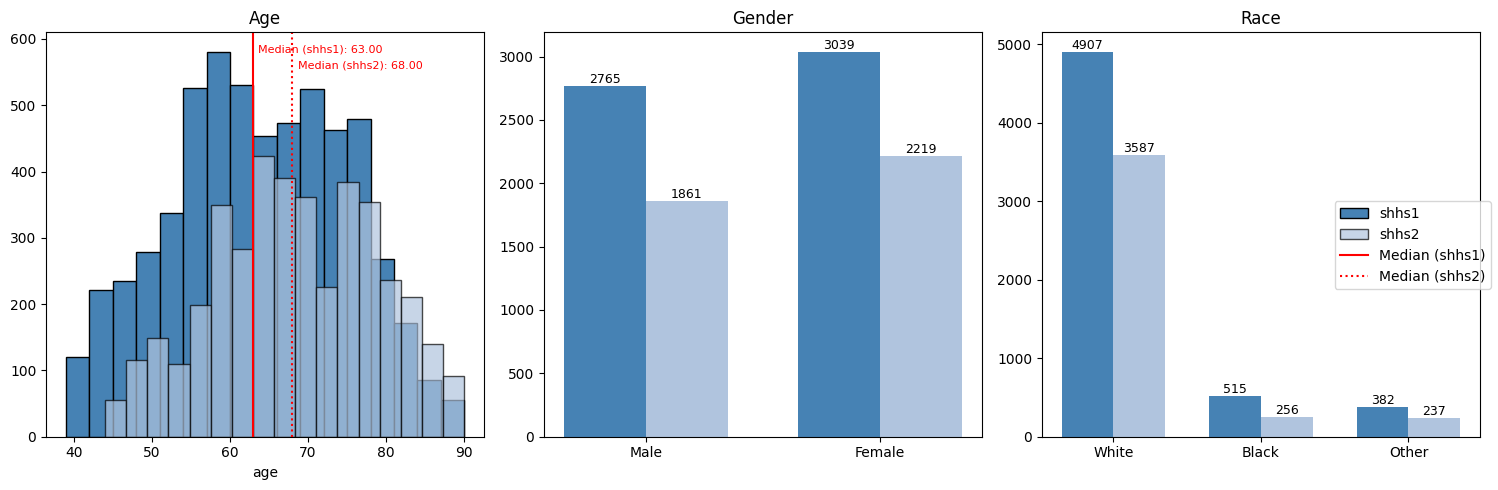

In [8]:
# demographic: age, gender, race
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# age
median_age_s1 = shhs1['age_s1'].median()
median_age_s2 = shhs2['age_s2'].median()
ax[0].hist(shhs1['age_s1'], bins = 17, alpha=1, edgecolor='black', color='steelblue', label='shhs1') # min is 39, max is 90, 17 bins,x each bin is 3 years
ax[0].hist(shhs2['age_s2'], bins = 17, alpha=0.7, edgecolor='black', color='lightsteelblue', label='shhs2') # min is 39, max is 90, 17 bins,x each bin is 3 years
ax[0].set_title("Age")
ax[0].set_xlabel("age")
ax[0].axvline(median_age_s1, color='red', linestyle='-', label='Median (shhs1)')
ax[0].axvline(median_age_s2, color='red', linestyle=':', label='Median (shhs2)')
add_median_labels(median_age_s1, ax[0], 'shhs1', 1.01)
add_median_labels(median_age_s2, ax[0], 'shhs2', 1.01)

# gender
categories = ['Male', 'Female']
width = 0.35
ind = np.arange(len(categories))

# Plot bars for shhs1 and shhs2
bars1_gender = ax[1].bar(ind - width/2, [shhs1[shhs1['gender'] == 1].shape[0], shhs1[shhs1['gender'] == 2].shape[0]], width, color='steelblue', label='shhs1')
bars2_gender = ax[1].bar(ind + width/2, [shhs2[shhs2['gender'] == 1].shape[0], shhs2[shhs2['gender'] == 2].shape[0]], width, color='lightsteelblue', label='shhs2')
ax[1].set_title("Gender")
ax[1].set_xticks(ind)
ax[1].set_xticklabels(categories)
add_labels(bars1_gender, ax[1])
add_labels(bars2_gender, ax[1])


# race
categories = ['White', 'Black', 'Other']
width = 0.35
ind = np.arange(len(categories))
bars1_race = ax[2].bar(ind - width/2, [shhs1[shhs1['race'] == 1].shape[0], shhs1[shhs1['race'] == 2].shape[0], shhs1[shhs1['race'] == 3].shape[0]], width, color='steelblue', label='shhs1')
bars2_race = ax[2].bar(ind + width/2, [shhs2[shhs2['race'] == 1].shape[0], shhs2[shhs2['race'] == 2].shape[0], shhs2[shhs2['race'] == 3].shape[0]], width, color='lightsteelblue', label='shhs2')
ax[2].set_title("Race")
ax[2].set_xticks(ind)
ax[2].set_xticklabels(categories)
add_labels(bars1_race, ax[2])
add_labels(bars2_race, ax[2])

# add shared legend
handles, labels = ax[0].get_legend_handles_labels()  # get the handles and labels from one of the subplots
fig.legend(handles, labels, loc='right')  # create a legend using the handles and labels

plt.tight_layout()
plt.savefig('demographics.jpg', format='jpg', dpi=300)

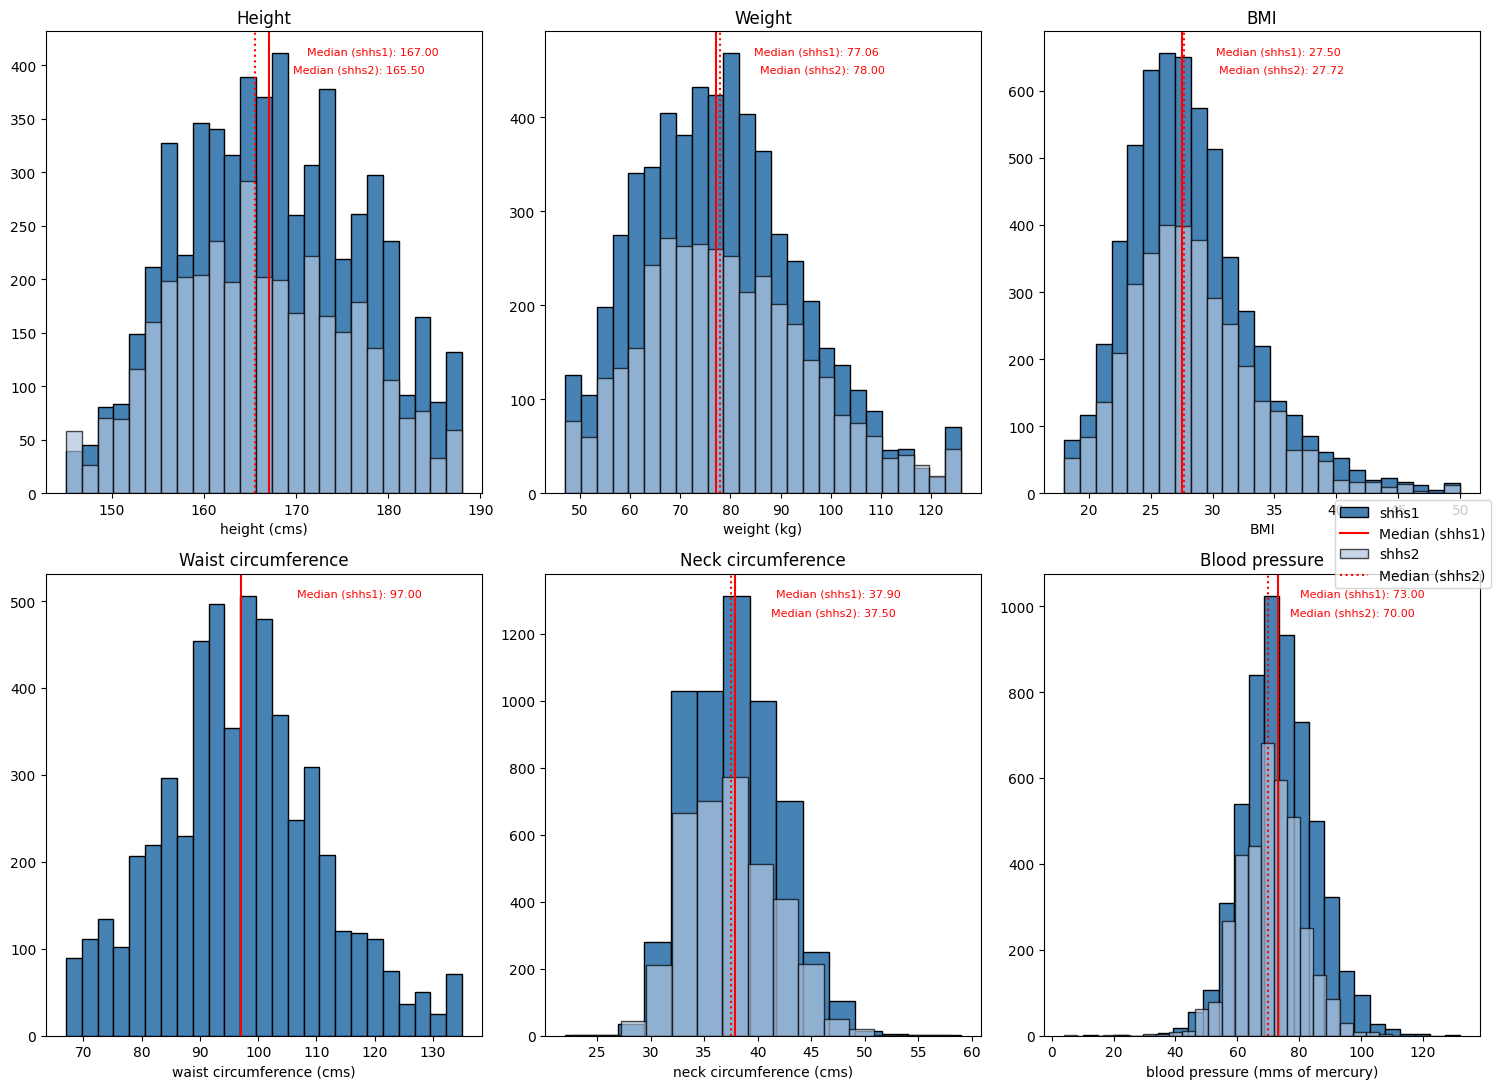

In [9]:
# body measurement: neck circumference, waist circumference, BMI, weight, height, blood pressure (diasbp)
fig, ax = plt.subplots(2, 3, figsize=(15, 11))

# height
median_height_s1 = shhs1['height'].median()
ax[0, 0].hist(shhs1['height'], bins=25, alpha=1, edgecolor='black', color='steelblue', label='shhs1')
ax[0, 0].set_title("Height")
ax[0, 0].set_xlabel("height (cms)")
ax[0, 0].axvline(median_height_s1, color='red', linestyle='-', label='Median (shhs1)')
add_median_labels(median_height_s1, ax[0, 0], 'shhs1', 1.025)

median_height_s2 = shhs2['pm207'].median()
ax[0, 0].hist(shhs2['pm207'], bins=25, alpha=0.7, edgecolor='black', color='lightsteelblue', label='shhs2')
ax[0, 0].set_title("Height")
ax[0, 0].set_xlabel("height (cms)")
ax[0, 0].axvline(median_height_s2, color='red', linestyle=':', label='Median (shhs2)')
add_median_labels(median_height_s2, ax[0, 0], 'shhs2', 1.025)

# weight
median_weight_s1 = shhs1['weight'].median()
ax[0, 1].hist(shhs1['weight'], bins=25, alpha=1, edgecolor='black', color='steelblue', label='shhs1')
ax[0, 1].set_title("Weight")
ax[0, 1].set_xlabel("weight (kg)")
ax[0, 1].axvline(median_weight_s1, color='red', linestyle='-', label='Median (shhs1)')
add_median_labels(median_weight_s1, ax[0, 1], 'shhs1')

median_weight_s2 = shhs2['pm202'].median()
ax[0, 1].hist(shhs2['pm202'], bins=25, alpha=0.7, edgecolor='black', color='lightsteelblue', label='shhs2')
ax[0, 1].set_title("Weight")
ax[0, 1].set_xlabel("weight (kg)")
ax[0, 1].axvline(median_weight_s2, color='red', linestyle=':', label='Median (shhs2)')
add_median_labels(median_weight_s2, ax[0, 1], 'shhs2')

# bmi
median_bmi_s1 = shhs1['bmi_s1'].median()
ax[0, 2].hist(shhs1['bmi_s1'], bins=25, alpha=1, edgecolor='black', color='steelblue', label='shhs1')
ax[0, 2].set_title("BMI")
ax[0, 2].set_xlabel("BMI")
ax[0, 2].axvline(median_bmi_s1, color='red', linestyle='-', label='Median (shhs1)')
add_median_labels(median_bmi_s1, ax[0, 2], 'shhs1')

median_bmi_s2 = shhs2['bmi_s2'].median()
ax[0, 2].hist(shhs2['bmi_s2'], bins=25, alpha=0.7, edgecolor='black', color='lightsteelblue', label='shhs2')
ax[0, 2].set_title("BMI")
ax[0, 2].set_xlabel("BMI")
ax[0, 2].axvline(median_bmi_s2, color='red', linestyle=':', label='Median (shhs2)')
add_median_labels(median_bmi_s2, ax[0, 2], 'shhs2')

# waist circumference
median_waist_s1 = shhs1['waist'].median()
ax[1, 0].hist(shhs1['waist'], bins=25, alpha=1, edgecolor='black', color='steelblue', label='shhs1')
ax[1, 0].set_title("Waist circumference")
ax[1, 0].set_xlabel("waist circumference (cms)")
ax[1, 0].axvline(median_waist_s1, color='red', linestyle='-', label='Median (shhs1)')
add_median_labels(median_waist_s1, ax[1, 0], 'shhs1')

# neck circumference
median_neck_s1 = shhs1['neck20'].median()
ax[1, 1].hist(shhs1['neck20'], bins=15, alpha=1, edgecolor='black', color='steelblue', label='shhs1')
ax[1, 1].set_title("Neck circumference")
ax[1, 1].set_xlabel("neck circumference (cms)")
ax[1, 1].axvline(median_neck_s1, color='red', linestyle='-', label='Median (shhs1)')
add_median_labels(median_neck_s1, ax[1, 1], 'shhs1')

median_neck_s2 = shhs2['pm212a'].median()
ax[1, 1].hist(shhs2['pm212a'], bins=15, alpha=0.7, edgecolor='black', color='lightsteelblue', label='shhs2')
ax[1, 1].set_title("Neck circumference")
ax[1, 1].set_xlabel("neck circumference (cms)")
ax[1, 1].axvline(median_neck_s2, color='red', linestyle=':', label='Median (shhs2)')
add_median_labels(median_neck_s2, ax[1, 1], 'shhs2')

# blood pressure
median_bp_s1 = shhs1['diasbp'].median()
ax[1, 2].hist(shhs1['diasbp'], bins=25, alpha=1, edgecolor='black', color='steelblue', label='shhs1')
ax[1, 2].set_title("Blood pressure")
ax[1, 2].set_xlabel("blood pressure (mms of mercury)")
ax[1, 2].axvline(median_bp_s1, color='red', linestyle='-', label='Median (shhs1)')
add_median_labels(median_bp_s1, ax[1, 2], 'shhs1')

median_bp_s2 = shhs2['avg23bpd_s2'].median()
ax[1, 2].hist(shhs2['avg23bpd_s2'], bins=25, alpha=0.7, edgecolor='black', color='lightsteelblue', label='shhs2')
ax[1, 2].set_title("Blood pressure")
ax[1, 2].set_xlabel("blood pressure (mms of mercury)")
ax[1, 2].axvline(median_bp_s2, color='red', linestyle=':', label='Median (shhs2)')
add_median_labels(median_bp_s2, ax[1, 2], 'shhs2')

handles, labels = ax[0, 0].get_legend_handles_labels()  # get the handles and labels from one of the subplots
fig.legend(handles, labels, loc='right')  # create a legend using the handles and labels
plt.subplots_adjust(right=0.88)

plt.tight_layout()
plt.savefig('body measurement.jpg', format='jpg', dpi=300)

Text(0.5, 1.0, 'History of diabetes')

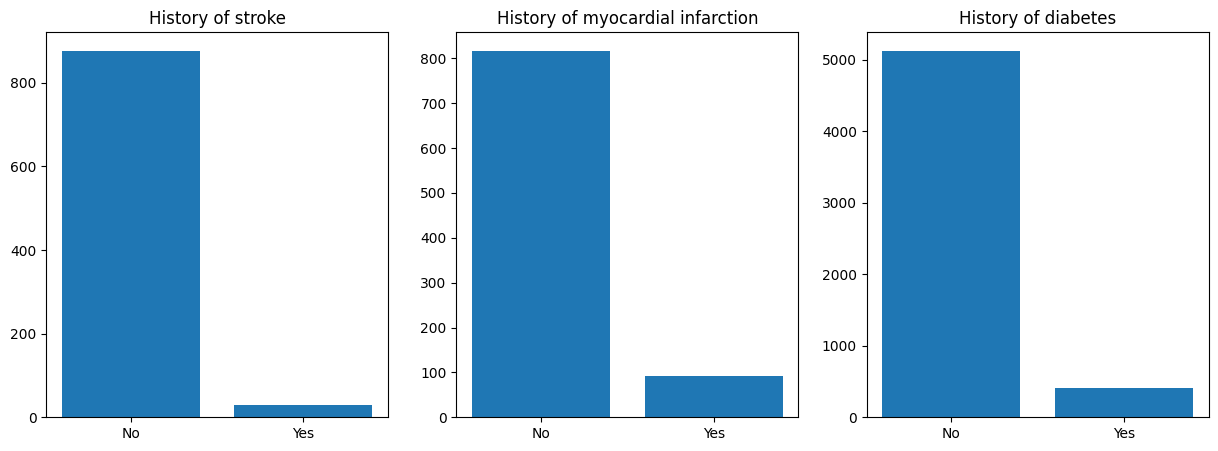

In [10]:
# medical condition: heart attack, stroke, diabetes (parrptdiab)
# make a grid to show people with heart attack and stroke together, heart attack alone ..., how many people suffer none of these health problem
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(['No', 'Yes'], [shhs1[shhs1['prev_hx_stroke'] == 0].shape[0], shhs1[shhs1['prev_hx_stroke'] == 1].shape[0]])
ax[0].set_title("History of stroke")

ax[1].bar(['No', 'Yes'], [shhs1[shhs1['prev_hx_mi'] == 0].shape[0], shhs1[shhs1['prev_hx_mi'] == 1].shape[0]])
ax[1].set_title("History of myocardial infarction")

ax[2].bar(['No', 'Yes'], [shhs1[shhs1['parrptdiab'] == 0].shape[0], shhs1[shhs1['parrptdiab'] == 1].shape[0]])
ax[2].set_title("History of diabetes")

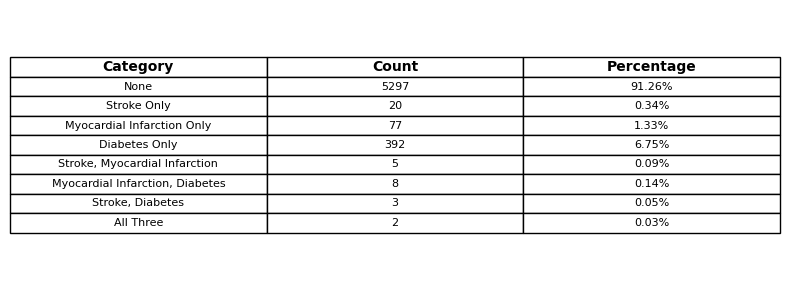

In [11]:
stroke = shhs1['prev_hx_stroke'] == 1
mi = shhs1['prev_hx_mi'] == 1
diabetes = shhs1['parrptdiab'] == 1

# Calculating the counts for each category
none = shhs1[~stroke & ~mi & ~diabetes].shape[0]
stroke_only = shhs1[stroke & ~mi & ~diabetes].shape[0]
mi_only = shhs1[~stroke & mi & ~diabetes].shape[0]
diabetes_only = shhs1[~stroke & ~mi & diabetes].shape[0]
stroke_mi = shhs1[stroke & mi & ~diabetes].shape[0]
mi_diabetes = shhs1[~stroke & mi & diabetes].shape[0]
stroke_diabetes = shhs1[stroke & ~mi & diabetes].shape[0]
all_three = shhs1[stroke & mi & diabetes].shape[0]

# Creating the pie chart
labels = ['None', 'Stroke Only', 'Myocardial Infarction Only', 'Diabetes Only', 'Stroke, Myocardial Infarction',
          'Myocardial Infarction, Diabetes', 'Stroke, Diabetes', 'All Three']
values_s1 = [none, stroke_only, mi_only, diabetes_only, stroke_mi, mi_diabetes, stroke_diabetes, all_three]

# Create a DataFrame with the categories, counts, and percentages
df = pd.DataFrame({
    'Category': labels,
    'Count': values_s1,
    'Percentage': [f"{round((v / sum(values_s1)) * 100, 2)}%" for v in values_s1]
})

# Plotting the DataFrame as a table and removing axis
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')

# Adjust the table properties for better visualization
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)

for (row, col), cell in tbl.get_celld().items():
  if (row == 0) or (col == -1):
    cell.set_text_props(fontproperties=FontProperties(weight='bold'))

plt.tight_layout()
plt.savefig('medical condition.jpg', format='jpg', dpi=300)

In [12]:
bin_edges = [0, 5, 15, 30, 100]
colors = ['green', 'yellow', 'orange', 'red']
#colors_2 = ['lime', 'lightyellow', 'moccasin', 'lightsalmon']
symptoms = ['healthy', 'mild', 'moderate', 'severe']

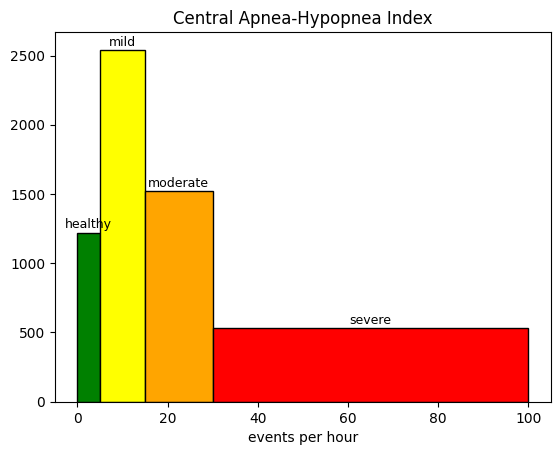

In [13]:
# target variable: Central Apnea-Hypopnea Index
fig, ax = plt.subplots()

# A custom histogram function to return the heights
def custom_hist(ax, data, bins, bin_idx, **kwargs):
    counts, _, patches = ax.hist(data, bins=[bins[bin_idx], bins[bin_idx + 1]], **kwargs)
    return counts[0]  # Return the height of the bar

# Loop to plot histograms and position labels
for i in range(len(bin_edges) - 1):
    bar_height = custom_hist(ax, shhs1['ahi_c0h3a'], bin_edges, i, color=colors[i], edgecolor='black', alpha=1)
    midpoint = (bin_edges[i] + bin_edges[i+1]) / 2
    ax.text(midpoint, bar_height + 10, symptoms[i], ha='center', va='bottom', fontsize=9)  # 5 is an offset to place text slightly above bar

plt.title('Central Apnea-Hypopnea Index')
plt.xlabel('events per hour')
plt.show()

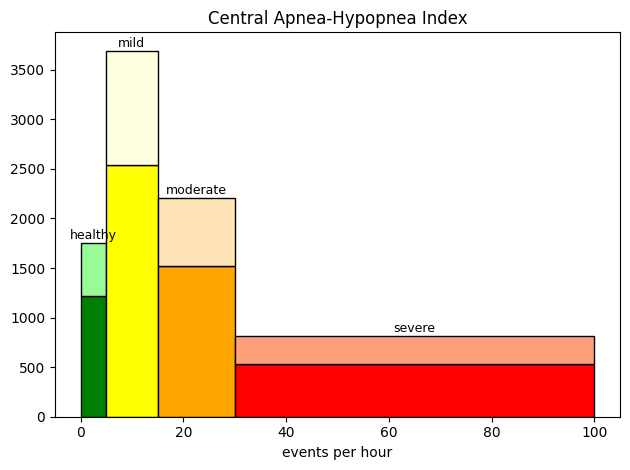

In [14]:
import matplotlib.pyplot as plt

bin_edges = [0, 5, 15, 30, 100]
colors = ['green', 'yellow', 'orange', 'red']
colors_2 = ['palegreen', 'lightyellow', 'moccasin', 'lightsalmon']
symptoms = ['healthy', 'mild', 'moderate', 'severe']
fig, ax = plt.subplots()

# A custom histogram function to return the heights
def custom_hist(ax, data1, data2, bins, bin_idx, colors, colors_2, **kwargs):
    counts1, _, patches1 = ax.hist(data1, bins=[bins[bin_idx], bins[bin_idx + 1]], color=colors[bin_idx], bottom=0, **kwargs)
    counts2, _, patches2 = ax.hist(data2, bins=[bins[bin_idx], bins[bin_idx + 1]], color=colors_2[bin_idx], bottom=counts1[0], **kwargs)
    return counts1[0], counts2[0]

# Loop to plot histograms and position labels
for i in range(len(bin_edges) - 1):
    bar_height1, bar_height2 = custom_hist(ax, shhs1['ahi_c0h3a'], shhs2['ahi_c0h3a'], bin_edges, i, colors, colors_2, edgecolor='black', alpha=1)
    midpoint = (bin_edges[i] + bin_edges[i+1]) / 2
    ax.text(midpoint, bar_height1 + bar_height2 + 10, symptoms[i], ha='center', va='bottom', fontsize=9)

plt.title('Central Apnea-Hypopnea Index')
plt.xlabel('events per hour')

plt.tight_layout()
plt.savefig('CSA Hypopnea Index.jpg', format='jpg', dpi=300)